In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

url = 'https://raw.githubusercontent.com/marcanthonny/binusmarkeu/refs/heads/main/LC41.csv'
url2 = 'https://raw.githubusercontent.com/marcanthonny/binusmarkeu/refs/heads/main/LB41.csv'
url3 = 'https://raw.githubusercontent.com/marcanthonny/binusmarkeu/refs/heads/main/LA41.csv'

datalc41 = pd.read_csv(url, on_bad_lines='skip')
datalb41 = pd.read_csv(url2, on_bad_lines='skip')
datala41 = pd.read_csv(url3, on_bad_lines='skip')

datalc41.head()


,Final Profit,Delivered Percentage,Average Stock,Throughout Time,OTIF Percentage,Quality Performance,Flow Efficiency,Resource Efficiency
0,$-872,50%,28.6,06:22.6,0%,88%,8%,54%
1,$-104,50%,22.2,04:22.3,10%,97%,11%,52%
2,$892,70%,20.5,03:51.2,40%,99%,10%,45%
3,$-346,40%,23.4,"05:14,9",20%,91%,11%,49%
4,$492,80%,16.3,03:07.5,38%,78%,15%,57%


In [24]:
datalb41.head()

,Final Profit,Percentage Delivered,Average Stock,Throughout Time,OTIF Percentage,Quality Performance,Flow Efficiency,Resource Efficiency
0,750.0,70.0,19.1,223.066667,40.0,78.0,10.0,48.0
1,215.0,50.0,21.8,285.066667,30.0,100.0,11.0,44.0
2,-124.0,50.0,22.6,283.116667,10.0,94.0,10.0,48.0
3,974.0,70.0,19.1,231.066667,40.0,90.0,11.0,49.0
4,-1.0,20.0,16.8,416.100000,0.0,76.0,7.0,36.0


In [20]:
datalc41.rename(columns={'Delivered Percentage': "Percentage Delivered"}, inplace=True)
print(datalc41)

   Final Profit Percentage Delivered  Average Stock Throughout Time  \
0        $-872                   50%           28.6         06:22.6   
1        $-104                   50%           22.2         04:22.3   
2         $892                   70%           20.5         03:51.2   
3        $-346                   40%           23.4         05:14,9   
4         $492                   80%           16.3         03:07.5   
5         $759                   78%           16.3            3:20   
6       $2,205                  100%           21.6         03:04.2   
7        $-544                   53%           20.4         04:18.4   
8       $3,041                  100%            6.2         00:46.4   
9       $3,285                  100%            5.2         00:44.9   
10      $2,486                  100%            6.1            0:50   
11      $1,698                   75%            6.5         01:13,7   

   OTIF Percentage Quality Performance Flow Efficiency Resource Efficiency  

In [21]:
print(datala41)

   Final Profit Percentage Delivered  Average Stock Throughout Time  \
0         $162                   50%           21.8            4:46   
1         $431                   75%           20.1         04:17,5   
2        $-434                   50%           24.9         05:39.7   
3        $-547                   40%           25.5         05:12,5   
4         $292                   60%           21.8         04:01.5   
5        $-660                   50%           21.7         04:52.9   
6       $1,278                   85%           15.2            2:50   
7       $1,101                   75%           20.3            3:44   
8      $-1,332                   48%           28.0         05:54.5   
9        $-719                   57%           28.7         05:46,1   
10      $2,432                   98%           14.5         02:34,6   
11        $-97                   75%           24.3         03:53.8   
12      $3,435                  100%            3.6         28:00.0   
13    

In [22]:
print(datalb41)

   Final Profit Percentage Delivered  Average Stock Throughout Time  \
0         $750                   70%           19.1         03:43.4   
1         $215                   50%           21.8         04:45.4   
2        $-124                   50%           22.6         04:43.7   
3         $974                   70%           19.1         03:51.4   
4          $-1                   20%           16.8         06:56.6   
5         $171                   NaN           21.9         04:47.1   
6         $147                   50%           20.7         04:20,6   
7         $359                   85%           19.2         03:03.9   
8         $352                   65%           20.2         04:10.8   
9       $1,640                   93%           18.4         03:11.3   
10      $2,805                  100%           11.0            2:00   
11        $515                   90%           16.8         03:06.8   
12      $1,359                   90%           17.9          3:08.7   
13    

1. Correlation Analysis with Final Profit
Goal: Identify factors that have the strongest positive or negative correlation with Final Profit.
How: Calculate the correlation matrix and see which variables have the highest positive or negative correlations with Final Profit. For example, high Quality Performance and Flow Efficiency might positively impact profit, while low Delivered Percentage could have a negative impact.

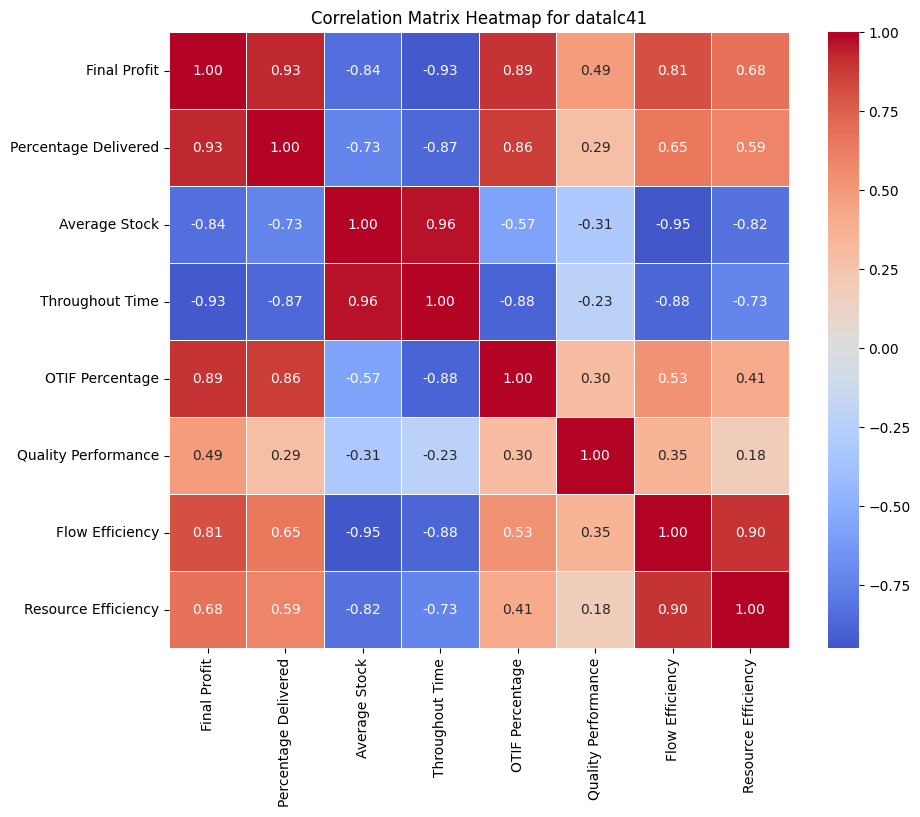

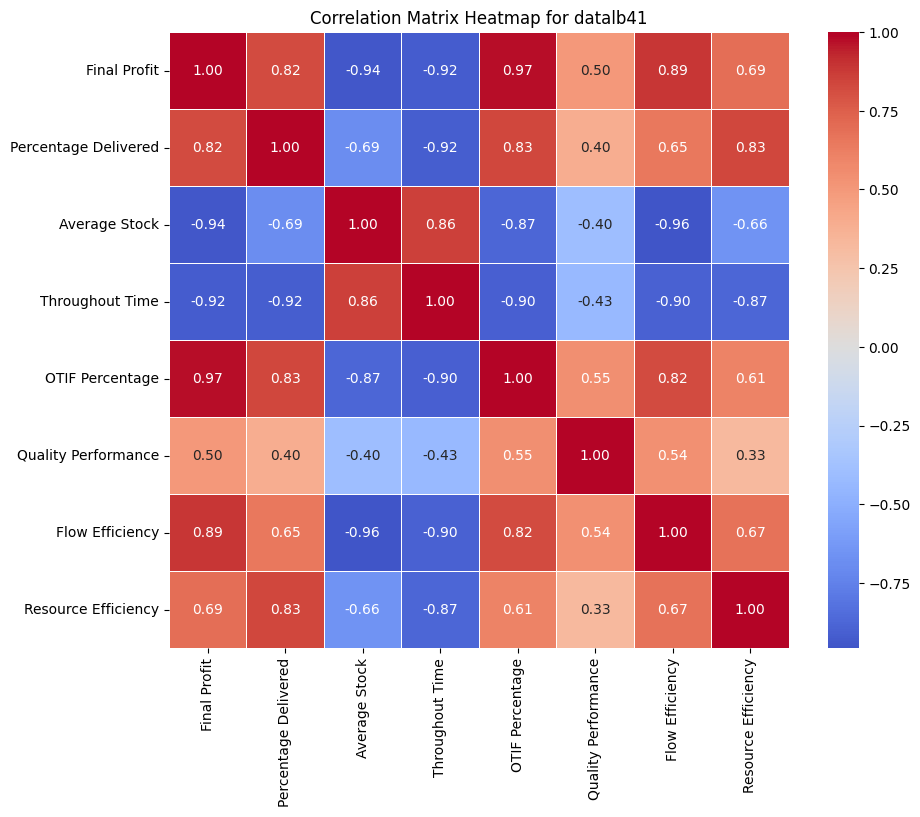

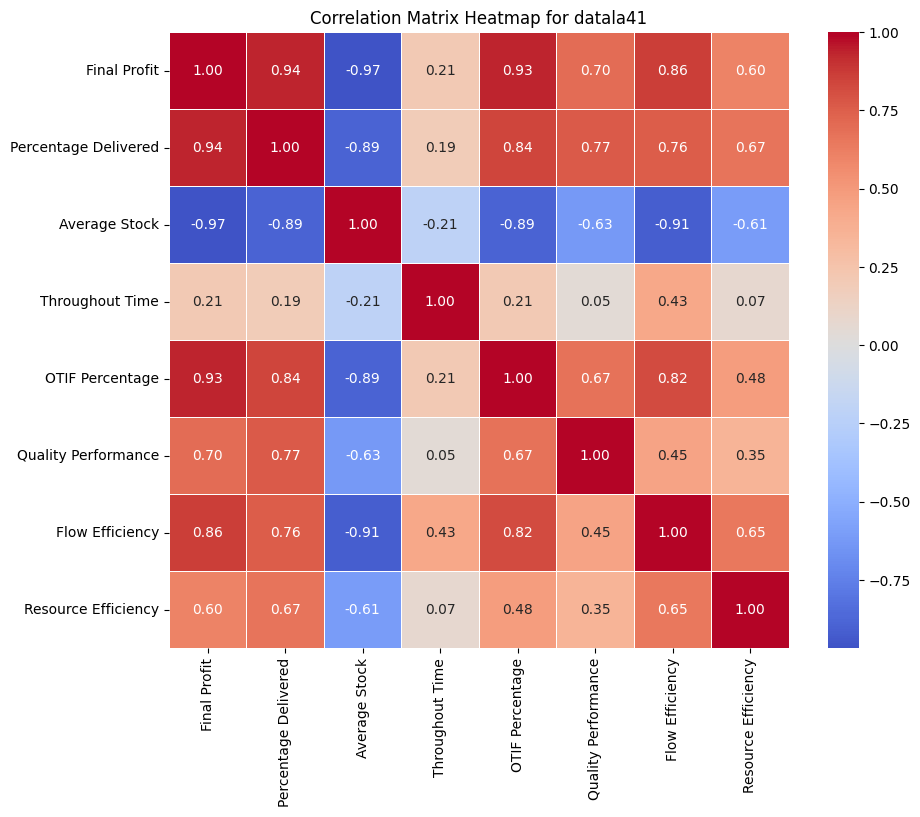

In [23]:
# Function to clean and convert columns for a given dataset
def clean_dataset(data):
    data['Final Profit'] = data['Final Profit'].replace('[\$,]', '', regex=True).astype(float)
    data['Percentage Delivered'] = data['Percentage Delivered'].replace('%', '', regex=True).astype(float)
    data['OTIF Percentage'] = data['OTIF Percentage'].replace('%', '', regex=True).astype(float)
    data['Quality Performance'] = data['Quality Performance'].replace('%', '', regex=True).astype(float)
    data['Flow Efficiency'] = data['Flow Efficiency'].replace('%', '', regex=True).astype(float)
    data['Resource Efficiency'] = data['Resource Efficiency'].replace('%', '', regex=True).astype(float)

    # Convert Throughout Time to minutes
    def convert_to_minutes(time_str):
        match = re.match(r'(\d+):(\d+)\.(\d+)', time_str)
        if match:
            hours = int(match.group(1))
            minutes = int(match.group(2))
            seconds = int(match.group(3))
            total_minutes = hours * 60 + minutes + seconds / 60
            return total_minutes
        else:
            return None  # Return None if the format doesn't match

    data['Throughout Time'] = data['Throughout Time'].apply(convert_to_minutes)

    # Check for any None values after conversion and handle them if needed
    if data['Throughout Time'].isnull().any():
        print("Warning: Some entries couldn't be converted. Please check the format of Throughout Time column.")

    return data

# Clean each dataset
datalc41 = clean_dataset(datalc41)
datalb41 = clean_dataset(datalb41)
datala41 = clean_dataset(datala41)

# Calculate correlation matrix for each dataset
correlation_matrix_c41 = datalc41.corr()
correlation_matrix_b41 = datalb41.corr()
correlation_matrix_a41 = datala41.corr()

# Function to plot heatmap for correlation matrix
def plot_correlation_heatmap(correlation_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()

# Plot heatmaps for each dataset
plot_correlation_heatmap(correlation_matrix_c41, "Correlation Matrix Heatmap for datalc41")
plot_correlation_heatmap(correlation_matrix_b41, "Correlation Matrix Heatmap for datalb41")
plot_correlation_heatmap(correlation_matrix_a41, "Correlation Matrix Heatmap for datala41")